In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'D:\Python\data\countries of the world.csv')

In [3]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


1. Посчитать медианное значение площади стран Океании.

In [4]:
data['Region'] = data['Region'].apply(str.strip)

In [5]:
data[data['Region'] == 'OCEANIA']['Area (sq. mi.)'].median()

811.0

2. Определить 10 стран с наименьшим уровнем грамотности.

In [6]:
data['Literacy (%)'] = data['Literacy (%)'].str.replace(',','.').apply(float)

In [7]:
data[['Country', 'Literacy (%)']].nsmallest(10, ['Literacy (%)'])

,Country,Literacy (%)
151,Niger,17.6
31,Burkina Faso,26.6
183,Sierra Leone,31.4
86,Guinea,35.9
0,Afghanistan,36.0
188,Somalia,37.8
73,"Gambia, The",40.1
180,Senegal,40.2
97,Iraq,40.4
21,Benin,40.9


3. Построить график суммарной численности населения в разбивке по регионам.

In [8]:
data3 = data[['Region', 'Population']].groupby('Region').sum().reset_index()
data3.sort_values(['Population'], inplace=True, ascending=False)

In [9]:
data3

,Region,Population
0,ASIA (EX. NEAR EAST),3687982236
9,SUB-SAHARAN AFRICA,749437000
4,LATIN AMER. & CARIB,561824599
10,WESTERN EUROPE,396339998
7,NORTHERN AMERICA,331672307
2,C.W. OF IND. STATES,280081548
5,NEAR EAST,195068377
6,NORTHERN AFRICA,161407133
3,EASTERN EUROPE,119914717
8,OCEANIA,33131662


<AxesSubplot:xlabel='Population', ylabel='Region'>

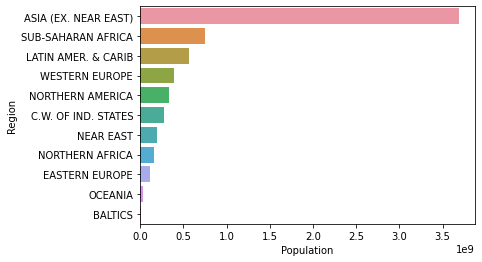

In [10]:
sns.barplot(y=data3['Region'], x=data3['Population'])

4. На основании данных, ответить на вопрос, в каком регионе наблюдается наибольший миграционный отток населения.

Считаем уход/приход людей для каждой страны. Пустые значения заменим на медианные

In [11]:
data['Net migration']=data['Net migration'].str.replace(',','.').apply(float)
data['Net migration'].fillna(data['Net migration'].median(), inplace=True)

In [12]:
data4 = data[['Region','Net migration', 'Population']]

In [13]:
data4['gone'] = data4['Net migration']*data4['Population']/100
data4.drop(['Net migration'], axis=1, inplace=True)

In [14]:
data4sum = data4.groupby(['Region']).sum()

In [15]:
data4sum['%'] = data4sum['gone']/data4sum['Population']*100

In [18]:
data4sum

,Population,gone,%
Region,,,
ASIA (EX. NEAR EAST),3687982236,-6.999308e+06,-0.189787
BALTICS,7184974,-1.180354e+05,-1.642810
C.W. OF IND. STATES,280081548,-6.370902e+05,-0.227466
EASTERN EUROPE,119914717,-5.784345e+05,-0.482372
LATIN AMER. & CARIB,561824599,-8.623469e+06,-1.534904
NEAR EAST,195068377,3.297529e+05,0.169045
NORTHERN AFRICA,161407133,-6.857407e+05,-0.424852
NORTHERN AMERICA,331672307,1.214622e+07,3.662115
OCEANIA,33131662,9.007438e+05,2.718680


In [16]:
## в процентах
data4sum.sort_values(['%'], ascending=False).head(1)

,Population,gone,%
Region,,,
NORTHERN AMERICA,331672307,1.214622e+07,3.662115


In [17]:
## в абсолютном значении
data4sum.sort_values(['gone'], ascending=False).head(1)

,Population,gone,%
Region,,,
NORTHERN AMERICA,331672307,1.214622e+07,3.662115
